<a href="https://colab.research.google.com/github/sahankrt20/AI-BOOTCAMP-PROJECT/blob/main/stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [110]:
from google.colab import files
uploaded=files.upload()

Saving NFLX.csv to NFLX (2).csv


In [129]:
df=pd.read_csv("NFLX.csv")

In [130]:
df.shape

(3119, 7)

In [131]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [132]:
df.reset_index(inplace=True)
df.columns

Index(['index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [133]:
df['Date']

,Date
0,2010-01-04
1,2010-01-05
2,2010-01-06
3,2010-01-07
4,2010-01-08
...,...
3114,2022-05-17
3115,2022-05-18
3116,2022-05-19
3117,2022-05-20


In [134]:
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index if not already done
df.set_index('Date', inplace=True)

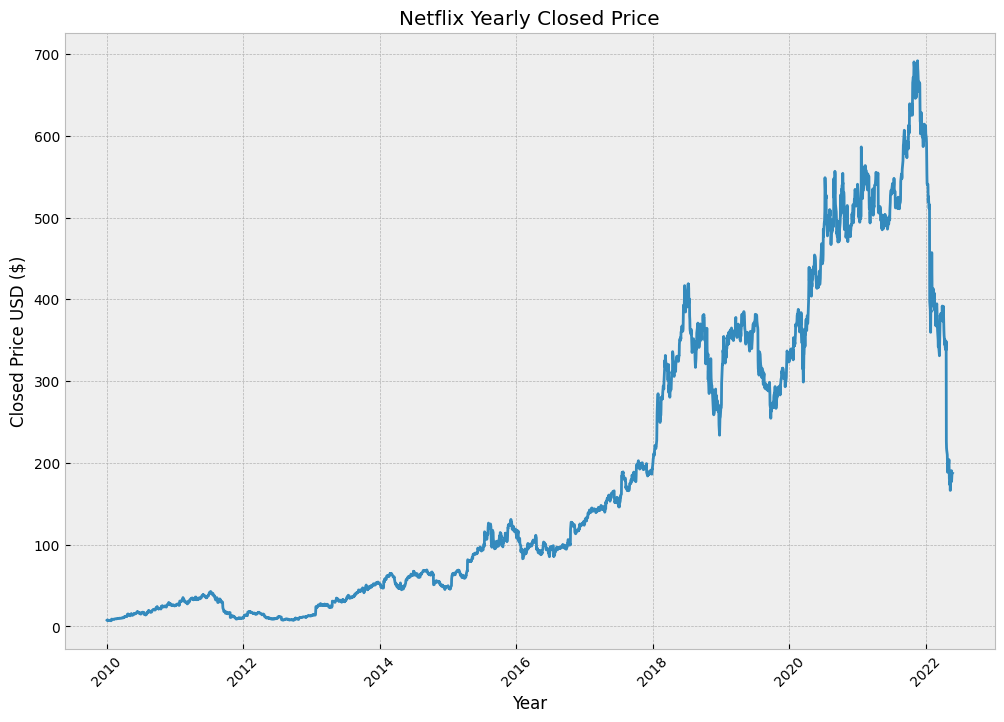

In [135]:

plt.figure(figsize=(12, 8))
plt.title("Netflix Yearly Closed Price")
plt.xlabel("Year")
plt.ylabel("Closed Price USD ($)")
plt.plot(df['Close'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [136]:
df['Price Change']=df['Close']-df['Open']

In [137]:
df['Price Change']

,Price Change
Date,
2010-01-04,-0.291429
2010-01-05,-0.294286
2010-01-06,0.255714
2010-01-07,-0.245715
2010-01-08,0.115715
...,...
2022-05-17,1.390000
2022-05-18,-9.529999
2022-05-19,5.429993


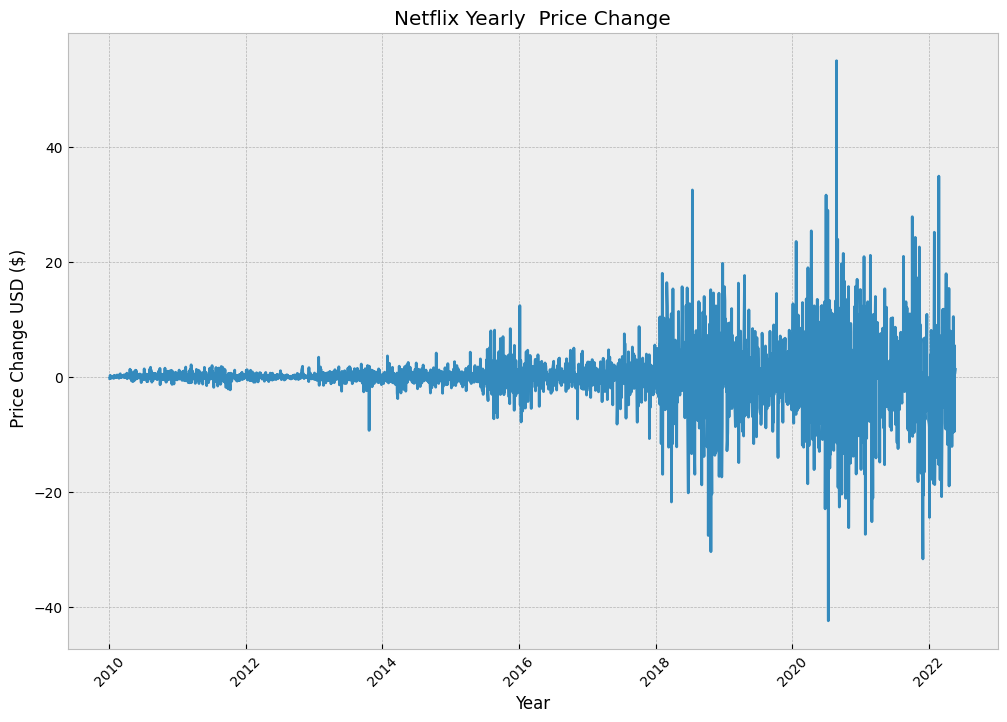

In [138]:
plt.figure(figsize=(12, 8))
plt.title("Netflix Yearly  Price Change")
plt.xlabel("Year")
plt.ylabel(" Price Change USD ($)")
plt.plot(df['Price Change'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [139]:
df

,index,Open,High,Low,Close,Adj Close,Volume,Price Change
Date,,,,,,,,
2010-01-04,0,7.931429,7.961429,7.565714,7.640000,7.640000,17239600,-0.291429
2010-01-05,1,7.652857,7.657143,7.258571,7.358571,7.358571,23753100,-0.294286
2010-01-06,2,7.361429,7.672857,7.197143,7.617143,7.617143,23290400,0.255714
2010-01-07,3,7.731429,7.757143,7.462857,7.485714,7.485714,9955400,-0.245715
2010-01-08,4,7.498571,7.742857,7.465714,7.614286,7.614286,8180900,0.115715
...,...,...,...,...,...,...,...,...
2022-05-17,3114,189.169998,191.399994,185.169998,190.559998,190.559998,9876700,1.390000
2022-05-18,3115,186.720001,187.699997,176.270004,177.190002,177.190002,9665600,-9.529999
2022-05-19,3116,178.050003,186.300003,175.710007,183.479996,183.479996,10448500,5.429993


In [140]:
df=df[['Close']]
df

,Close
Date,
2010-01-04,7.640000
2010-01-05,7.358571
2010-01-06,7.617143
2010-01-07,7.485714
2010-01-08,7.614286
...,...
2022-05-17,190.559998
2022-05-18,177.190002
2022-05-19,183.479996


In [141]:
df.columns

Index(['Close'], dtype='object')

In [162]:
future_days=1000
#Create New Column
df['Predictions']=df[['Close']].shift(-future_days)
df.tail()

<ipython-input-162-c47e893c16d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predictions']=df[['Close']].shift(-future_days)


,Close,Predictions
Date,,
2022-05-17,190.559998,NaN
2022-05-18,177.190002,NaN
2022-05-19,183.479996,NaN
2022-05-20,186.350006,NaN
2022-05-23,187.440002,NaN


In [164]:
X = np.array(df.drop(['Predictions'], axis=1))[:-future_days]
print(X)


[[  7.64    ]
 [  7.358571]
 [  7.617143]
 ...
 [351.600006]
 [359.929993]
 [361.809998]]


In [166]:
#Create the target dataset y and convert into numpy array
y=np.array(df['Predictions'])[:-future_days]
print(y)

[ 54.368572  54.055714  53.847141 ... 183.479996 186.350006 187.440002]


In [167]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)
tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [169]:
# Get the last X rows of the feature dataset
X_future = df.drop(['Predictions'], axis=1)[:-future_days]  # Fixed axis specification
X_future = X_future.tail(future_days)  # Get the last 'future_days' rows
X_future = np.array(X_future)
X_future


array([[ 61.465714],
       [ 63.378571],
       [ 64.097145],
       [ 63.055714],
       [ 62.882858],
       [ 62.78857 ],
       [ 62.337143],
       [ 63.458572],
       [ 62.80143 ],
       [ 63.154285],
       [ 62.942856],
       [ 67.585716],
       [ 66.677139],
       [ 67.478569],
       [ 65.802856],
       [ 63.578571],
       [ 63.285713],
       [ 62.650002],
       [ 62.851429],
       [ 64.654289],
       [ 64.155716],
       [ 63.491428],
       [ 62.765713],
       [ 63.452858],
       [ 64.564285],
       [ 61.584286],
       [ 61.128571],
       [ 60.76857 ],
       [ 60.265713],
       [ 60.665714],
       [ 60.611427],
       [ 62.05143 ],
       [ 60.388573],
       [ 60.771427],
       [ 60.385715],
       [ 60.407143],
       [ 61.471428],
       [ 64.238571],
       [ 63.692856],
       [ 64.505714],
       [ 63.772858],
       [ 64.504288],
       [ 64.410004],
       [ 65.58429 ],
       [ 66.571426],
       [ 66.878571],
       [ 67.455711],
       [ 67.4

In [170]:
#Show the model for tree prediction
tree_prediction=tree.predict(X_future)
print(tree_prediction)
print()

[365.799988  367.450012  361.399994  360.570007  361.450012  363.829987
 267.429993  392.869995  391.980011  390.399994  404.980011  416.76001
 380.709991  345.869995  384.480011  399.390015  355.929993  395.420013
 391.429993  398.179993  377.049988  328.899994  408.25      418.970001
 415.630005  418.649994  413.5       395.799988  400.480011  315.
 331.440002  364.230011  343.1349945 362.660004  343.1349945 362.869995
 363.089996  355.209991  334.959991  337.450012  338.380005  344.5
 343.089996  350.920013  351.829987  347.609985  345.869995  345.869995
 364.579987  337.48999   326.399994  322.440002  344.709991  327.730011
 338.019989  327.730011  339.170013  367.880005  364.579987  368.48999
 356.869995  337.48999   338.019989  348.410004  341.179993  366.959991
 350.920013  348.410004  355.929993  369.950012  368.149994  364.559998
 350.350006  355.209991  343.089996  365.359985  361.190002  369.609985
 374.130005  377.880005  380.709991  374.130005  381.429993  395.420013
 377.

In [171]:
#Show the model for tree prediction
tree_prediction=tree.predict(X_future)
print(tree_prediction)
print()

lr_prediction=lr.predict(X_future)
print(lr_prediction)

[365.799988  367.450012  361.399994  360.570007  361.450012  363.829987
 267.429993  392.869995  391.980011  390.399994  404.980011  416.76001
 380.709991  345.869995  384.480011  399.390015  355.929993  395.420013
 391.429993  398.179993  377.049988  328.899994  408.25      418.970001
 415.630005  418.649994  413.5       395.799988  400.480011  315.
 331.440002  364.230011  343.1349945 362.660004  343.1349945 362.869995
 363.089996  355.209991  334.959991  337.450012  338.380005  344.5
 343.089996  350.920013  351.829987  347.609985  345.869995  345.869995
 364.579987  337.48999   326.399994  322.440002  344.709991  327.730011
 338.019989  327.730011  339.170013  367.880005  364.579987  368.48999
 356.869995  337.48999   338.019989  348.410004  341.179993  366.959991
 350.920013  348.410004  355.929993  369.950012  368.149994  364.559998
 350.350006  355.209991  343.089996  365.359985  361.190002  369.609985
 374.130005  377.880005  380.709991  374.130005  381.429993  395.420013
 377.

In [172]:
prediction=tree_prediction
valid=df[X.shape[0]:]
valid['Predictions']=prediction


<ipython-input-172-4ed4a2a01545>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=prediction


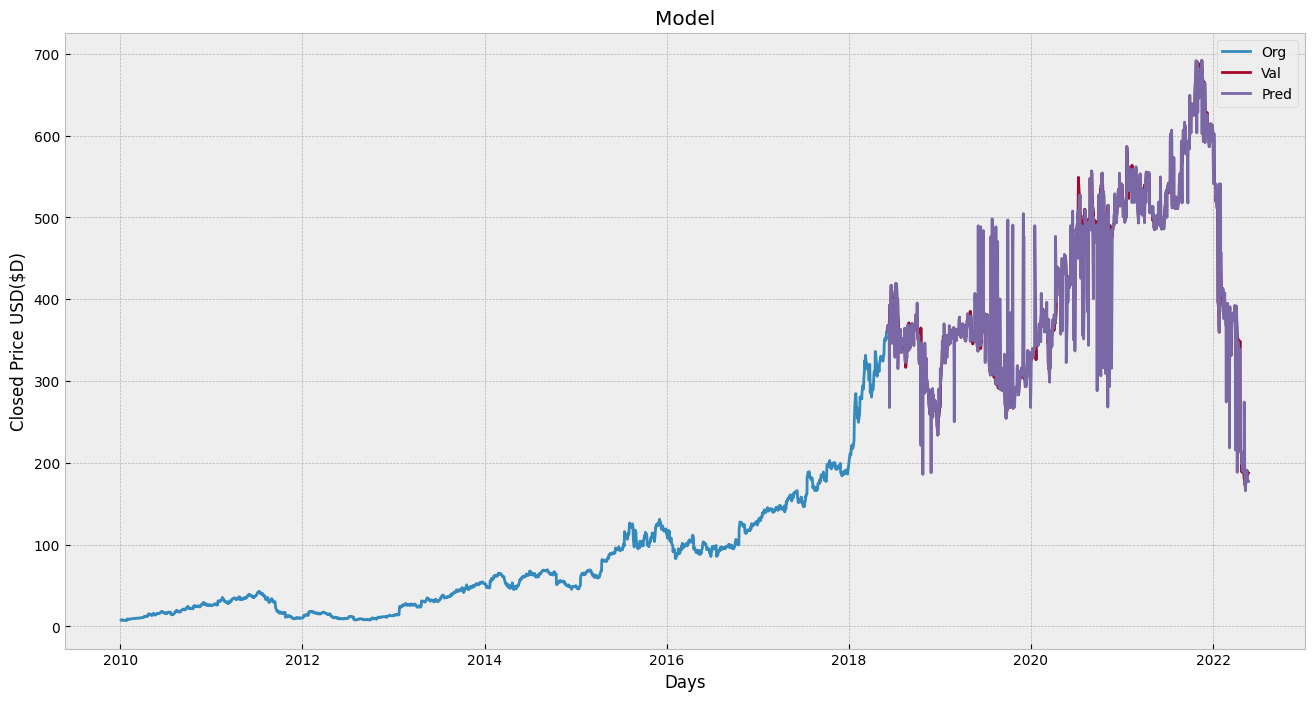

In [173]:

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel("Days")
plt.ylabel("Closed Price USD($D)")
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Org','Val','Pred'])
plt.show()

